# Folium Demo
http://folium.readthedocs.io/en/latest/

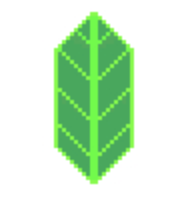

**Python Data. Leaflet.js Maps.**


Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.


**Concepts**


Folium makes it easy to visualize data that’s been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.


The library has a number of built-in tilesets from 
- OpenStreetMap, 
- Mapbox, and 
- Stamen, 

and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

### About this ipynb

**The purpose of this ipnyb (interactive python notebook) is:** to demonstrate how to use the folium library to visualize geogrpahic data.


Format of the notebook:
- Import libraries
- Install folium
- Load data
- Cursory exploration of the data
- Use folium to generate visualizations

### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
% matplotlib inline 

# %matplotlib inline sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends 
# like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.

In [3]:
import folium

ModuleNotFoundError: No module named 'folium'

The installation requirements and methods can be found here:


http://folium.readthedocs.io/en/latest/installing.html#requirements

In [4]:
import time

In [5]:
start_time = time.time()

!pip install folium 

print('It only takes approximately {} seconds!'.format(time.time() - start_time))

  Using cached https://files.pythonhosted.org/packages/b5/18/13c018655f722896f25791f1db687db5671bd79285e05b3dd8c309b36414/branca-0.3.0-py3-none-any.whl
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
It only takes approximately 1.2389137744903564 seconds!


In [6]:
import folium

In [149]:
from dateutil import parser
from datetime import datetime, timedelta

### Load Data

In [11]:
pwd
# jupyter notebook can handle command line

'/home/jovyan'

Import your data from the respective directory that you have it saved.

In [12]:
data = pd.read_csv('./cellmetadata.csv')

In [13]:
data.head()

Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   
3  505010153111F         HAYMARKET #   
4      5.05E+106         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   
3  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 13:13     Phone   
4  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 17:27     Phone   

    Latitude   Longitude  
0 -33.892933  151.202296  
1 -33.892933  151.202296  
2 -33.880329  151.205690  
3 -33.880329  151.205690  
4 -33.880329  151.205690

### Data Dictionary Summary Table:
| Field Name | Description | 
| --- | --- |
| Cell CGI | cell phone tower identifier |
| Cell Tower | cell phone tower location |
| Comm Identifier | redacted recipient of communication |
| Comm Timedate String | time of communication | 
| Comm Type | type of communication | 
| Latitude | latitude of communication | 
| Longitude | longitude of communication |

### Cursory Exploration of the Data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [16]:
data.describe().T

count        mean       std         min         25%        50%  \
Latitude   10476.0  -35.136188  3.141723  -42.884810  -33.884603  -33.79661   
Longitude  10476.0  150.612841  1.470169  144.848243  151.202296  151.26654   

                 75%        max  
Latitude   -33.78815  -33.55731  
Longitude  151.26654  151.28934

Sometimes it's helpful to take a quick `.value_counts()` to get a sense of the data.
Additionally, it might prove helpful to generate some standard visualizations such as (where applicable):
- histograms and/or distribution plots
- scatter and/or boxplots

In [17]:
data['Comm Type'].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

There are 3 unique communication types:
1. Internet
2. Phone
3. SMS

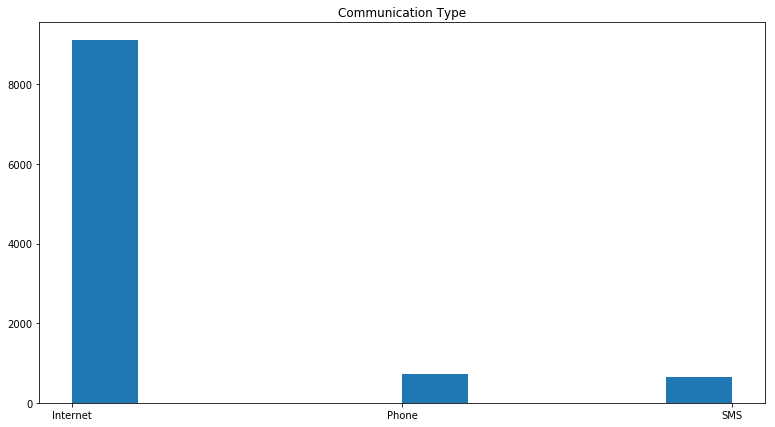

In [36]:
plt.figure(figsize=(13,7))
_ = plt.hist(data['Comm Type'])
plt.title('Communication Type')
plt.show()

In [19]:
data['Cell Tower Location'].nunique()

71

There are 71 unique cell tower locations (as shown by the code below)

In [18]:
data['Cell Tower Location'].value_counts()

BALGOWLAH HAYES ST                          4301
CHIPPENDALE                                 1084
SUNDERLAND ST                                723
REDFERN TE                                   712
HAYMARKET #                                  563
BRICKWORKS                                   501
HARBORD 22 WAINE ST                          465
FAIRLIGHT 137 SYDNEY RD                      454
MANLY #                                      231
NEW TOWN                                     197
CHINATOWN                                    161
BEECHWORTH                                   112
BALGOWLAH VILLAGE SHOPPING CENTRE IBC        106
MANLY SOUTH STEYNE                            92
BROADWAY OTC                                  85
MASCOT INTERNATIONAL AIRPORT TERMINAL T1      65
71 MACQUARIE ST                               49
SURRY HILLS 418A ELIZABETH ST                 45
MANLY NTH STEYNE                              40
MASCOT M5 MOTORWAY EMERGENCY STAIRS           33
BALGOWLAH TE        

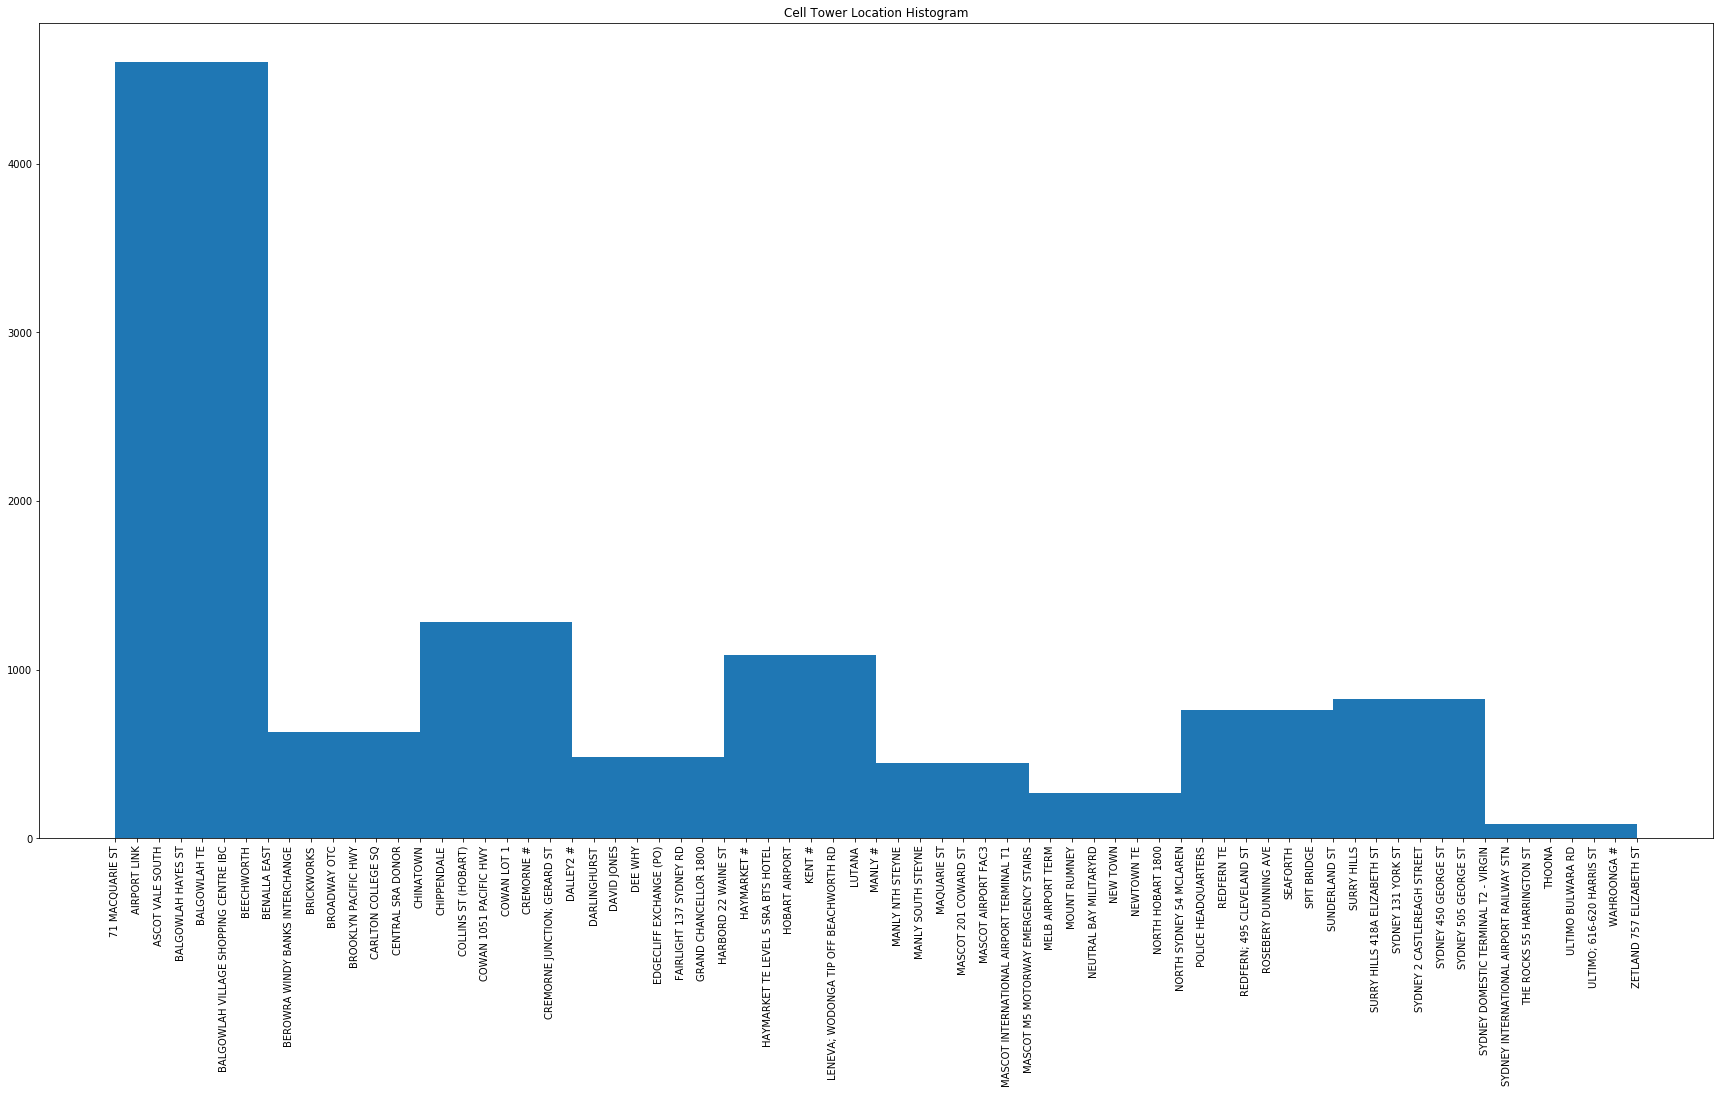

In [68]:
plt.figure(figsize = (30, 15))
_ = plt.hist(data['Cell Tower Location'])
plt.title('Cell Tower Location Histogram')
plt.xticks(rotation=90)
plt.show()

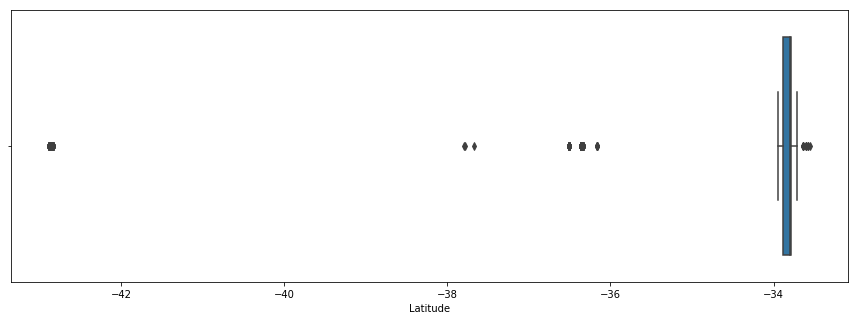

In [76]:
plt.figure(figsize=(15, 5))
_ = sns.boxplot(data['Latitude'])

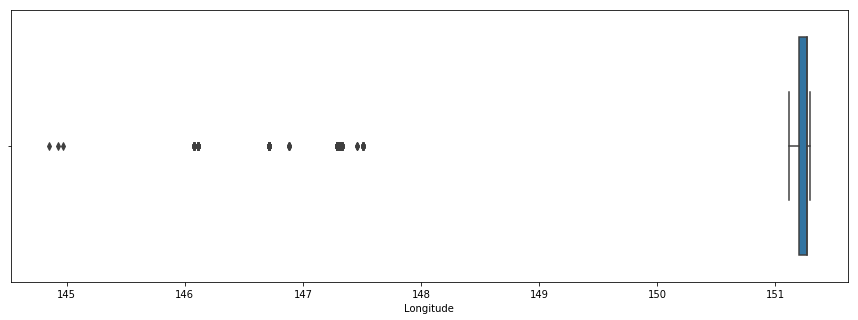

In [77]:
plt.figure(figsize=(15, 5))
_ = sns.boxplot(data['Longitude'])

### Visualizing Latitude & Longitude
- Using scatter plots to visualize coordinates
- Using folium to visualize coordinates

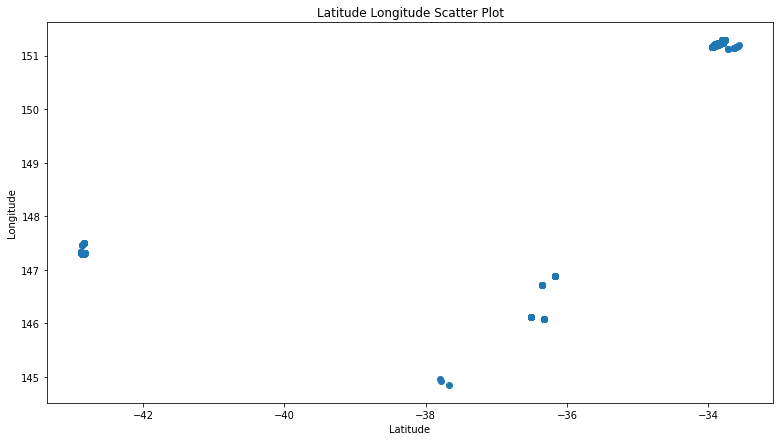

In [96]:
# scatter plot

plt.figure(figsize=(13, 7))
_ = plt.scatter(data['Latitude'], data['Longitude'])
plt.title('Latitude Longitude Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Data Prep for Visualizing with folium

In [79]:
coordinates = list(zip(data['Latitude'], data['Longitude']))
data['coordinates'] = coordinates

In [98]:
# grab the top 5 locations that this paritcular cell phone user frequents based on the latitude/longitude pairings
top_5_locations = data['coordinates'].value_counts()[:5]
top_5_locations

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
Name: coordinates, dtype: int64

In [99]:
data[data['coordinates'] == (top_5_locations.index[0])].head()

Cell Cgi Cell Tower Location Comm Identifier Comm Timedate String  \
715  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 17:17   
716  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:08   
717  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:08   
718  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:09   
719  505012056EF02  BALGOWLAH HAYES ST             NaN        9/24/14 19:10   

    Comm Type  Latitude  Longitude             coordinates  
715  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
716  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
717  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
718  Internet -33.78815  151.26654  (-33.78815, 151.26654)  
719  Internet -33.78815  151.26654  (-33.78815, 151.26654)

_____________

### Where is our cell phone user located?

**Let's look at the location that this particular cell phone user frequents the most and unveil the mystery of where they're located!**

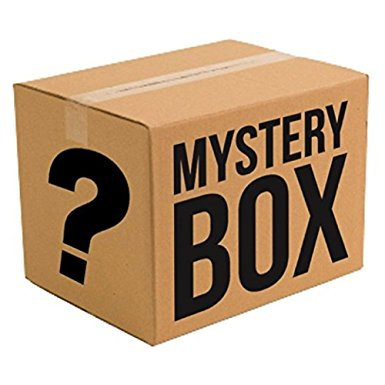

In [90]:
mfLat = -33.78815
mfLon = 151.26654

# map format Open Street Format
map_osm = folium.Map(location=[mfLat, mfLon])

In [91]:
map_osm

### Let's get Amelie creepy ....
#### (...yes, Amelie is creepy)
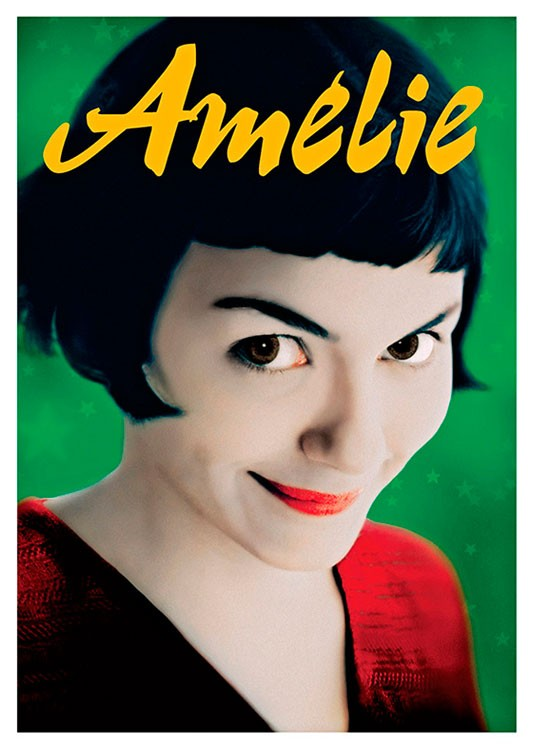

In [93]:
# let's set the default zoom for when it loads
map_osm = folium.Map(location =[mfLat, mfLon], zoom_start = 20)
map_osm

In [100]:
top_5_locations

(-33.78815, 151.26654)                       4301
(-33.88417103, 151.20235)                    1084
(-42.843379999999996, 147.29568999999998)     723
(-33.89293336, 151.20229619999998)            712
(-33.88032891, 151.2056904)                   563
Name: coordinates, dtype: int64

Init signature: folium.Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon')
Docstring:     
Creates an Icon object that will be rendered
using Leaflet.awesome-markers.

Parameters
----------
color : str, default 'blue'
    The color of the marker. You can use:

        ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']

icon_color : str, default 'white'
    The color of the drawing on the marker. You can use colors above,
    or an html color code.
icon : str, default 'info-sign'
    The name of the marker sign.
    See Font-Awesome website to choose yours.
    Warning : depending on the icon you choose you may need to adapt
    the `prefix` as well.
angle : int, default 0
    The icon will be rotated by this amount of degrees.
prefix : str, default 'glyphicon'
    The prefix states the source of the icon. 'fa' for font-awesome or
    'glyphicon' for bootstrap 3.

In [117]:
# let's make some assumptions

map_osm1 = folium.Map(location=top_5_locations.index[0])

folium.Marker(location=top_5_locations.index[0], popup='home?', icon=folium.Icon(icon='home')).add_to(map_osm1)
folium.Marker(location=top_5_locations.index[1], popup='work?', icon=folium.Icon(icon='briefcase', \
                                                                                 color='darkred')).add_to(map_osm1)

map_osm1

In [192]:
# write a function to add markers:

def add_marker (location, your_map, icon_label=None, icon_color='blue', icon='info-sign'):
    folium.Marker(location=location, popup=icon_label, \
                  icon=folium.Icon(icon=icon, color=icon_color)).add_to(your_map)
    return your_map

In [173]:
add_marker(top_5_locations.index[2], map_osm1)

### Cursory analysis of the datetime information

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 8 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
coordinates             10476 non-null object
dtypes: float64(2), object(6)
memory usage: 654.8+ KB


In [138]:
type(data['Comm Timedate String'][0])

str

In [140]:
data[data['coordinates']==top_5_locations.index[2]]

Cell Cgi Cell Tower Location  \
169   505012950037C       SUNDERLAND ST   
171   505012950601A       SUNDERLAND ST   
172   505012950601A       SUNDERLAND ST   
173   505012950601A       SUNDERLAND ST   
175   505012950037F       SUNDERLAND ST   
509   5050140014D01       SUNDERLAND ST   
510   5050140014D01       SUNDERLAND ST   
511   505012950037C       SUNDERLAND ST   
512   505012950037C       SUNDERLAND ST   
513   505012950037C       SUNDERLAND ST   
2442  505012950037C       SUNDERLAND ST   
2449  505012950037C       SUNDERLAND ST   
2450  505012950037C       SUNDERLAND ST   
2451  505012950037C       SUNDERLAND ST   
2460  505012950037C       SUNDERLAND ST   
2469  505012950037C       SUNDERLAND ST   
2470  505012950037C       SUNDERLAND ST   
2473  505012950037C       SUNDERLAND ST   
2475  505012950037C       SUNDERLAND ST   
2477  505012950037C       SUNDERLAND ST   
2478  505012950037C       SUNDERLAND ST   
2480  505012950037C       SUNDERLAND ST   
2481  505012950037C       SUNDERLAND ST   
2488  505012950037C       SUNDERLAND ST   
2491  505012950037C       SUNDERLAND ST   
2493  505012950037C       SUNDERLAND ST   
2494  505012950037C       SUNDERLAND ST   
2495  505012950037C       SUNDERLAND ST   
2496  505012950037C       SUNDERLAND ST   
2497  505012950037C       SUNDERLAND ST   
...             ...                 ...   
5927  505012950037C       SUNDERLAND ST   
5930  505012950037C       SUNDERLAND ST   
5933  505012950037C       SUNDERLAND ST   
5935  505012950037C       SUNDERLAND ST   
5936  505012950037C       SUNDERLAND ST   
5939  505012950037C       SUNDERLAND ST   
5941  505012950037C       SUNDERLAND ST   
5942  505012950037C       SUNDERLAND ST   
5946  505012950037C       SUNDERLAND ST   
5947  505012950037C       SUNDERLAND ST   
5948  505012950037C       SUNDERLAND ST   
5949  505012950037C       SUNDERLAND ST   
5951  505012950037C       SUNDERLAND ST   
5953  505012950037C       SUNDERLAND ST   
5954  505012950037C       SUNDERLAND ST   
5955  505012950037C       SUNDERLAND ST   
5957  505012950037C       SUNDERLAND ST   
5958  505012950037C       SUNDERLAND ST   
5961  505012950037C       SUNDERLAND ST   
5962  505012950037C       SUNDERLAND ST   
5963  505012950037C       SUNDERLAND ST   
5964  505012950037C       SUNDERLAND ST   
5965  505012950037C       SUNDERLAND ST   
5968  505012950037C       SUNDERLAND ST   
5969  505012950037C       SUNDERLAND ST   
5972  505012950037C       SUNDERLAND ST   
5973  505012950037C       SUNDERLAND ST   
5974  505012950037C       SUNDERLAND ST   
5977  505012950037C       SUNDERLAND ST   
5978  505012950037C       SUNDERLAND ST   

                               Comm Identifier Comm Timedate String Comm Type  \
169   a804558e420ececf05faedf05722704a115f1b50         5/2/14 21:14       SMS   
171   12e3d1b0c95aa32b6890c4455918dfc10e09fb51         5/2/14 21:17       SMS   
172   a3dfe2f2e41135cee91149d5d5ffb323b30a6354         5/2/14 21:20       SMS   
173   a3dfe2f2e41135cee91149d5d5ffb323b30a6354         5/2/14 21:20       SMS   
175   7b79c2b0f76f45c73ae121ece7cc9561dc3934b5         5/4/14 16:12     Phone   
509   bc0b01860486b0f0a240ce8419d3d7553fe404ab         8/11/14 8:32       SMS   
510   bc0b01860486b0f0a240ce8419d3d7553fe404ab         8/11/14 8:35       SMS   
511   62157ccf2910019ffd915b11fa037243b75c1624         8/11/14 9:13     Phone   
512   62157ccf2910019ffd915b11fa037243b75c1624         8/11/14 9:16     Phone   
513   a5834ee77b2c1dd26c78966f5e2c989c453878ba        8/11/14 12:41     Phone   
2442                                       NaN       11/12/14 16:14  Internet   
2449                                       NaN       11/12/14 17:18  Internet   
2450                                       NaN       11/12/14 17:25  Internet   
2451                                       NaN       11/12/14 17:25  Internet   
2460                                       NaN       11/12/14 18:46  Internet   
2469                                       NaN  

In [148]:
data['Comm Timedate String'][0]

'4/1/14 9:40'

In [144]:
test_dt = parser.parse(data['Comm Timedate String'][0])
test_dt

datetime.datetime(2014, 4, 1, 9, 40)

In [147]:
data['datetime'] = [parser.parse(element) for element in data['Comm Timedate String']]

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 9 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
coordinates             10476 non-null object
datetime                10476 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 736.7+ KB


In [161]:
data['year'] = [element.year for element in data['datetime']]
data['month']= [element.month for element in data['datetime']]

In [163]:
data['time'] = [datetime.time(element) for element in data['datetime']]
data['date'] = [datetime.date(element) for element in data['datetime']]

In [164]:
data.head(3)

Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   

    Latitude   Longitude                         coordinates  \
0 -33.892933  151.202296  (-33.89293336, 151.20229619999998)   
1 -33.892933  151.202296  (-33.89293336, 151.20229619999998)   
2 -33.880329  151.205690         (-33.88032891, 151.2056904)   

             datetime  year      time        date  month  
0 2014-04-01 09:40:00  2014  09:40:00  2014-04-01      4  
1 2014-04-01 09:42:00  2014  09:42:00  2014-04-01      4  
2 2014-04-01 13:13:00  2014  13:13:00  2014-04-01      4

In [171]:
data[data['coordinates']==top_5_locations.index[2]]['date'].unique()

array([datetime.date(2014, 5, 2), datetime.date(2014, 5, 4),
       datetime.date(2014, 8, 11), datetime.date(2014, 11, 12),
       datetime.date(2014, 11, 13), datetime.date(2014, 11, 14),
       datetime.date(2014, 11, 15), datetime.date(2014, 12, 20),
       datetime.date(2014, 12, 21), datetime.date(2014, 12, 22),
       datetime.date(2014, 12, 23), datetime.date(2014, 12, 24),
       datetime.date(2014, 12, 25), datetime.date(2014, 12, 26)], dtype=object)

In [183]:
add_marker(top_5_locations.index[2], map_osm1, icon_label='vacation?', icon_color='green', icon='fa.sun')

In [198]:
map_terrain = folium.Map(location=top_5_locations.index[0], tiles='Stamen Terrain', zoom_start=13)
add_marker(location=top_5_locations.index[0], your_map=map_terrain, icon='home')
